# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['NA19025', 'NA19474', 'NA19461', 'NA19472', 'NA19462', 'NA19475', 'NA19440', 'NA19017', 'NA19454', 'NA19375', 'NA19452', 'NA19431', 'NA19468', 'NA19327', 'NA19446', 'NA19319', 'NA19023', 'NA19307', 'NA19428', 'NA19397', 'NA19435', 'NA19434', 'NA19024', 'NA19044', 'NA19338', 'NA19324', 'NA19038', 'NA19377', 'NA19028', 'NA19449', 'NA19360', 'NA19351', 'NA19401', 'NA19399', 'NA19315', 'NA19385', 'NA19334', 'NA19448', 'NA19372', 'NA19467', 'NA19310', 'NA19355', 'NA19346', 'NA19371', 'NA19473', 'NA19390', 'NA19378', 'NA19457', 'NA19443', 'NA19347', 'NA19026', 'NA19430', 'NA19019', 'NA19451', 'NA19321', 'NA19331', 'NA19455', 'NA19384', 'NA19439', 'NA19350', 'NA19438', 'NA19394', 'NA19316', 'NA19436', 'NA19332', 'NA19314', 'NA19323', 'NA19037', 'NA19429', 'NA19391', 'NA19456', 'NA19471', 'NA19020', 'NA19318', 'NA19466', 'NA19030', 'NA19031', 'NA19317', 'NA19309', 'NA19308', 'NA19374', 'NA19445', 'NA19041', 'NA19393', 'NA19463', 'NA19437', 'NA19398', 'NA19376', 'NA19395', 'NA19379', 'NA19403', 'NA19312', 'NA19035', 'NA19027', 'NA19380', 'NA19036', 'NA19404', 'NA19359']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/LWK/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/LWK/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,TARDBP
3,1,1,1,1,1,1,1,0,1,0,...,1,1,0,0,1,1,1,1,1,TARDBP
4,1,1,1,1,1,1,1,0,1,0,...,1,1,0,0,1,1,1,1,1,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,43,8,3,24,4,22,18,10,35,19,...,22,21,26,19,32,16,11,6,5,17
ANG,5,15,6,6,11,5,6,17,10,13,...,11,8,9,9,3,6,5,2,5,3
ATXN2,157,11,16,168,20,10,23,168,173,23,...,159,157,171,8,185,24,150,174,160,12
C19ORF12,12,17,14,15,20,19,14,16,21,12,...,16,16,16,15,15,13,12,14,11,16
C9ORF72,18,8,13,23,28,24,32,13,15,17,...,34,23,11,10,13,23,2,34,13,12


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
NA19025,24.777778
NA19474,23.242424
NA19461,20.919192
NA19472,23.515152
NA19462,21.444444


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
0,24.777778,23.242424,20.919192,23.515152,21.444444,22.89899,19.585859,23.292929,25.585859,21.10101,...,22.020202,28.484848,26.151515,24.121212,22.717172,21.959596,25.494949,23.505051,21.393939,22.212121


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
mean99,24.777778,23.242424,20.919192,23.515152,21.444444,22.89899,19.585859,23.292929,25.585859,21.10101,...,22.020202,28.484848,26.151515,24.121212,22.717172,21.959596,25.494949,23.505051,21.393939,22.212121


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,68.138889,63.916667,57.527778,64.666667,58.972222,62.972222,53.861111,64.055556,70.361111,58.027778,...,60.555556,78.333333,71.916667,66.333333,62.472222,60.388889,70.111111,64.638889,58.833333,61.083333
std,232.912387,243.276724,209.547606,211.985444,198.289469,216.111543,178.358251,208.518029,235.874683,196.810059,...,220.599112,268.608159,254.495060,251.066753,186.914417,205.780782,245.243876,215.501031,183.828569,215.776919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,3.000000,4.000000,4.750000,4.000000,4.750000,4.750000,3.750000,2.000000,4.750000,...,3.750000,6.750000,8.000000,4.750000,4.750000,4.000000,3.750000,3.000000,4.500000,4.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
ALS2,43.000000,8.000000,3.000000,24.000000,4.000000,22.000000,18.000000,10.000000,35.000000,19.000000,...,22.000000,21.000000,26.000000,19.000000,32.000000,16.000000,11.000000,6.000000,5.000000,17.000000
ANG,5.000000,15.000000,6.000000,6.000000,11.000000,5.000000,6.000000,17.000000,10.000000,13.000000,...,11.000000,8.000000,9.000000,9.000000,3.000000,6.000000,5.000000,2.000000,5.000000,3.000000
ATXN2,157.000000,11.000000,16.000000,168.000000,20.000000,10.000000,23.000000,168.000000,173.000000,23.000000,...,159.000000,157.000000,171.000000,8.000000,185.000000,24.000000,150.000000,174.000000,160.000000,12.000000
C19ORF12,12.000000,17.000000,14.000000,15.000000,20.000000,19.000000,14.000000,16.000000,21.000000,12.000000,...,16.000000,16.000000,16.000000,15.000000,15.000000,13.000000,12.000000,14.000000,11.000000,16.000000
C9ORF72,18.000000,8.000000,13.000000,23.000000,28.000000,24.000000,32.000000,13.000000,15.000000,17.000000,...,34.000000,23.000000,11.000000,10.000000,13.000000,23.000000,2.000000,34.000000,13.000000,12.000000
CHCHD10,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000
CHMP2B,8.000000,3.000000,2.000000,18.000000,4.000000,8.000000,4.000000,23.000000,9.000000,4.000000,...,13.000000,11.000000,6.000000,3.000000,8.000000,6.000000,22.000000,8.000000,11.000000,8.000000
CHRNA3,18.000000,18.000000,29.000000,20.000000,32.000000,28.000000,5.000000,28.000000,16.000000,29.000000,...,16.000000,5.000000,25.000000,23.000000,20.000000,17.000000,15.000000,23.000000,13.000000,21.000000
CREST,129.000000,130.000000,5.000000,59.000000,75.000000,133.000000,83.000000,134.000000,133.000000,55.000000,...,9.000000,112.000000,105.000000,115.000000,138.000000,93.000000,121.000000,124.000000,111.000000,96.000000
DAO,10.000000,10.000000,24.000000,2.000000,9.000000,13.000000,6.000000,12.000000,3.000000,9.000000,...,11.000000,11.000000,9.000000,15.000000,11.000000,8.000000,21.000000,8.000000,15.000000,7.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,98.0,19.346939,13.797581,3.0,8.00,17.0,25.50,57.0
ANG,98.0,7.775510,3.949502,0.0,5.00,8.0,10.00,17.0
ATXN2,98.0,119.520408,67.190179,6.0,24.25,159.0,165.00,185.0
C19ORF12,98.0,17.510204,8.768788,7.0,14.00,16.0,19.00,52.0
C9ORF72,98.0,19.622449,10.149923,2.0,12.00,20.5,26.00,43.0
CHCHD10,98.0,2.030612,0.946552,0.0,1.00,2.0,3.00,4.0
CHMP2B,98.0,8.551020,5.079010,2.0,5.00,8.0,10.00,23.0
CHRNA3,98.0,19.744898,7.100619,0.0,16.00,19.0,25.75,33.0
CREST,98.0,91.051020,36.340705,1.0,61.00,93.0,121.00,146.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19404,NA19359,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,43,8,3,24,4,22,18,10,35,19,...,5,17,98.0,19.346939,13.797581,3.0,8.00,17.0,25.5,57.0
ANG,5,15,6,6,11,5,6,17,10,13,...,5,3,98.0,7.775510,3.949502,0.0,5.00,8.0,10.0,17.0
ATXN2,157,11,16,168,20,10,23,168,173,23,...,160,12,98.0,119.520408,67.190179,6.0,24.25,159.0,165.0,185.0
C19ORF12,12,17,14,15,20,19,14,16,21,12,...,11,16,98.0,17.510204,8.768788,7.0,14.00,16.0,19.0,52.0
C9ORF72,18,8,13,23,28,24,32,13,15,17,...,13,12,98.0,19.622449,10.149923,2.0,12.00,20.5,26.0,43.0


In [23]:
rdf

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19404,NA19359,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,43,8,3,24,4,22,18,10,35,19,...,5,17,98.0,19.346939,13.797581,3.0,8.00,17.0,25.50,57.0
ANG,5,15,6,6,11,5,6,17,10,13,...,5,3,98.0,7.775510,3.949502,0.0,5.00,8.0,10.00,17.0
ATXN2,157,11,16,168,20,10,23,168,173,23,...,160,12,98.0,119.520408,67.190179,6.0,24.25,159.0,165.00,185.0
C19ORF12,12,17,14,15,20,19,14,16,21,12,...,11,16,98.0,17.510204,8.768788,7.0,14.00,16.0,19.00,52.0
C9ORF72,18,8,13,23,28,24,32,13,15,17,...,13,12,98.0,19.622449,10.149923,2.0,12.00,20.5,26.00,43.0
CHCHD10,1,1,2,1,1,2,2,2,1,3,...,3,2,98.0,2.030612,0.946552,0.0,1.00,2.0,3.00,4.0
CHMP2B,8,3,2,18,4,8,4,23,9,4,...,11,8,98.0,8.551020,5.079010,2.0,5.00,8.0,10.00,23.0
CHRNA3,18,18,29,20,32,28,5,28,16,29,...,13,21,98.0,19.744898,7.100619,0.0,16.00,19.0,25.75,33.0
CREST,129,130,5,59,75,133,83,134,133,55,...,111,96,98.0,91.051020,36.340705,1.0,61.00,93.0,121.00,146.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,336
ANG,51
ATXN2,547
C19ORF12,131
C9ORF72,189
CHCHD10,16
CHMP2B,123
CHRNA3,155
CREST,433


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,8599
1,NEK1,1188
2,FIG4,786
3,SETX,629
4,SPG11,609
5,ELP3,566
6,ATXN2,547
7,CREST,433
8,ALS2,336
9,VAPB,289


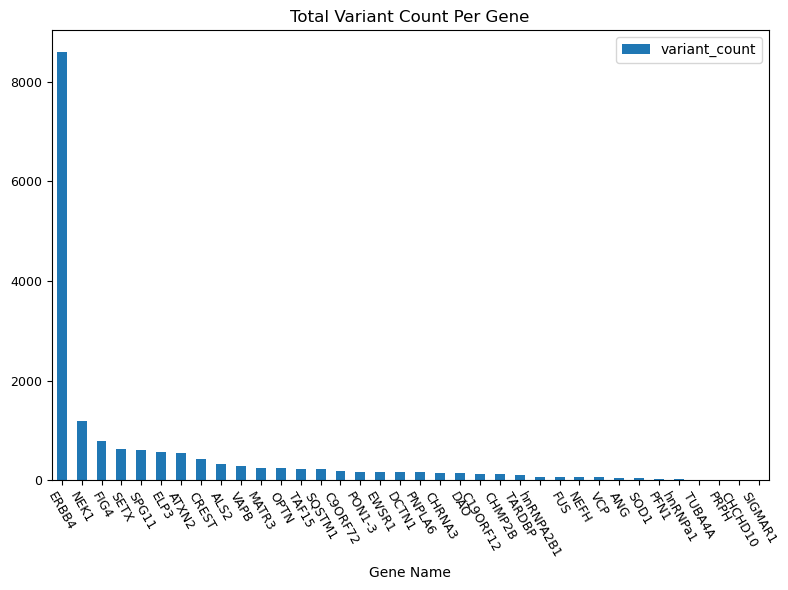

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,NA19025,2453
1,NA19474,2301
2,NA19461,2071
3,NA19472,2328
4,NA19462,2123


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2281.3571428571427), 216.1715741824907)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

14

In [39]:
len(bottom_genomes)

10

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,NA19025,NA19474,NA19461,NA19472,NA19462,NA19475,NA19440,NA19017,NA19454,NA19375,...,NA19395,NA19379,NA19403,NA19312,NA19035,NA19027,NA19380,NA19036,NA19404,NA19359
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,43,8,3,24,4,22,18,10,35,19,...,22,21,26,19,32,16,11,6,5,17
ANG,5,15,6,6,11,5,6,17,10,13,...,11,8,9,9,3,6,5,2,5,3
ATXN2,157,11,16,168,20,10,23,168,173,23,...,159,157,171,8,185,24,150,174,160,12
C19ORF12,12,17,14,15,20,19,14,16,21,12,...,16,16,16,15,15,13,12,14,11,16
C9ORF72,18,8,13,23,28,24,32,13,15,17,...,34,23,11,10,13,23,2,34,13,12


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,NA19454,NA19446,NA19024,NA19360,NA19378,NA19394,NA19323,NA19037,NA19456,NA19030,NA19393,NA19379,NA19403,NA19380
gene,,,,,,,,,,,,,,
ERBB4,1399,1498,1430,1465,1345,1671,1528,1477,1571,1424,1469,1620,1531,1474
NEK1,317,232,256,232,320,233,259,271,225,234,217,207,212,226
FIG4,77,94,82,100,74,60,55,64,78,59,108,78,100,60
SETX,26,21,43,50,50,23,42,20,63,25,55,54,9,67
SPG11,74,14,83,104,109,130,89,1,55,89,109,131,8,7


In [46]:
tgdf_bot_genomes.head()

,NA19440,NA19431,NA19044,NA19351,NA19372,NA19443,NA19455,NA19429,NA19318,NA19398
gene,,,,,,,,,,
ERBB4,1067,1037,948,858,1004,1051,1025,1229,1163,671
NEK1,222,236,15,218,186,121,192,233,316,226
FIG4,98,99,75,86,67,63,72,68,99,63
SETX,46,28,70,25,67,87,76,29,18,25
SPG11,10,51,106,142,9,7,109,3,9,9


## Plot stacked bar chart for top genes & top genomes

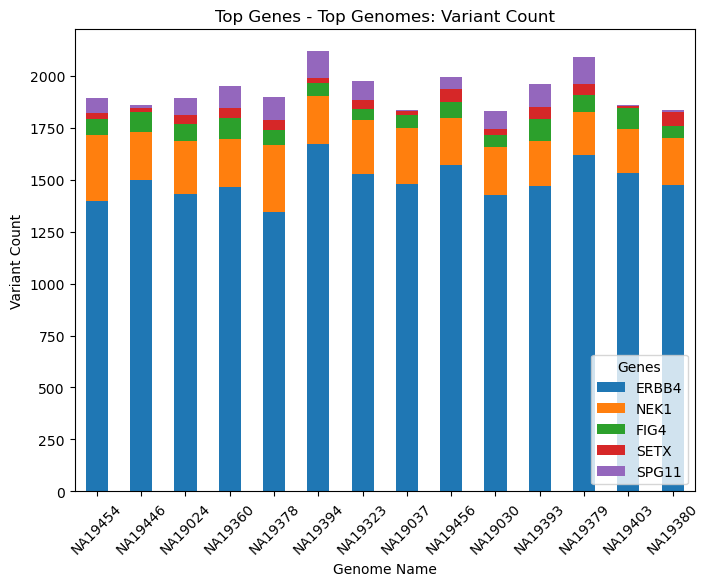

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

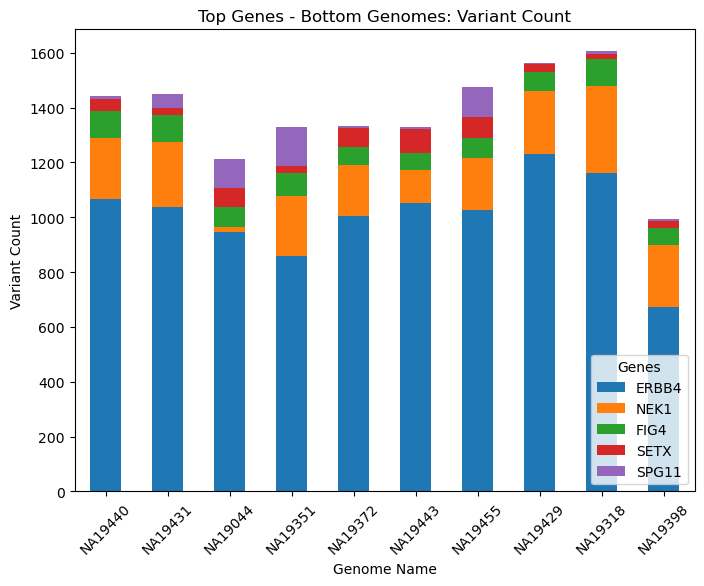

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()